#### 3-2. DNN으로 fashion-MNIST 분류하는 프로그램 


In [1]:
from tensorflow.keras import datasets
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 데이터셋 로드하기 
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape  # 60000개의 샘플 각각 28*28 크기 


# 전처리 : 0~1 사이로 변환 
train_images = train_images/255.0
test_images = test_images/255.0

In [2]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [3]:
# DNN 모델 생성 
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28)),  # input 
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')  # output
])


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [5]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7061 - accuracy: 0.7438 - val_loss: 0.4818 - val_accuracy: 0.8190
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4943 - accuracy: 0.8298 - val_loss: 0.4316 - val_accuracy: 0.8456
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4436 - accuracy: 0.8474 - val_loss: 0.4126 - val_accuracy: 0.8560
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4138 - accuracy: 0.8565 - val_loss: 0.3771 - val_accuracy: 0.8634
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3974 - accuracy: 0.8622 - val_loss: 0.3744 - val_accuracy: 0.8671
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3809 - accuracy: 0.8676 - val_loss: 0.3690 - val_accuracy: 0.8706
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3722 - accuracy: 0.8704 - val_loss: 0.3571 - val_accu

In [6]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8771


[0.3630499541759491, 0.8770999908447266]

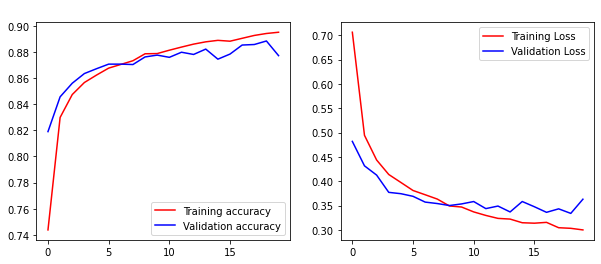

In [7]:
# 학습 과정 시각화 
def plot_history():    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'r', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label = 'Validation accuracy')
    plt.title('accuracy plot', color='white')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r', label = 'Training Loss')
    plt.plot(history.history['val_loss'], 'b', label = 'Validation Loss')
    plt.title('loss plot', color='white')
    plt.legend()

plot_history()
